# Shopify Summer 2021 Data Science Challenge 

## By: Jad El-Asmar

## Part 1

In this notebook, I will explore a dataset of sneaker orders from 100 sneaker shops. I will try to find out the reason behind a high average order value (AOv) of $3145.13. Then, I will determine a more accurate metric that would represent more this dataset.

I will be answering the following questions: Think about a better way to evaluate this data. What metric would you report for this dataset? What is its value?

## a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

### Local data path

In [1]:
local_data_path = "./data/shopify-dataset.csv"

### Read dataset 

In [2]:
import pandas as pd

# Read dataset into a pandas dataframe
df_data = pd.read_csv(local_data_path)


In [3]:
df_data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


### Data profiling for the current dataframe

In [4]:
from pandas_profiling import ProfileReport


profile_report = ProfileReport(df_data) 
profile_report.to_file(output_file='./data/output_pandas_profiling.html')

In [5]:
profile_report


By looking at the profile report and analyzing each variable, I noticed something strange in the order_amount variable. Indeed, the maximal value observed is 704000.

### View missing values 

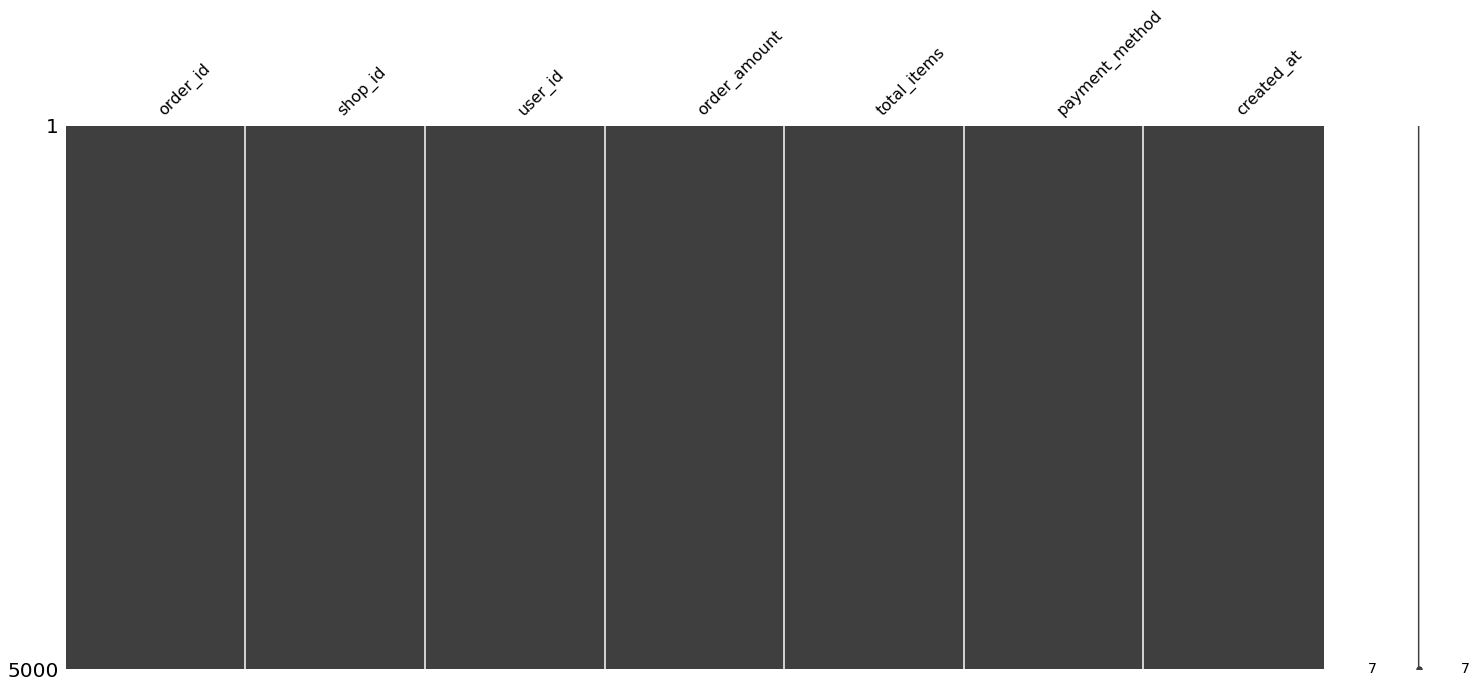

In [6]:
import missingno as mno
fig = mno.matrix(df_data)
fig_copy = fig.get_figure()
fig_copy.savefig('./data/matrix_missing_plot.png', bbox_inches = 'tight')

By looking at the previous diagram, we can see that there are no missing values in the dataset.

Text(0, 0.5, 'order_amount')

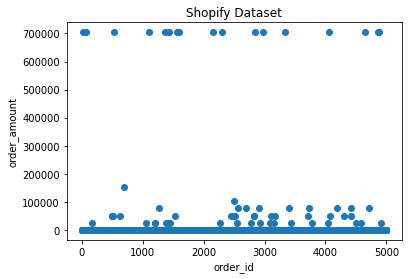

In [4]:
import matplotlib.pyplot as plt

# create a figure and axis
fig, ax = plt.subplots()

# scatter the order_id against the order_amount
ax.scatter(df_data['order_id'], df_data['order_amount'])

# set a title and labels
ax.set_title('Shopify Dataset')
ax.set_xlabel('order_id')
ax.set_ylabel('order_amount')

Text(0, 0.5, 'Count')

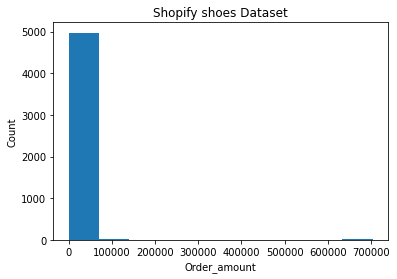

In [5]:
# create a figure and axis
fig, ax = plt.subplots()
ax.hist(df_data["order_amount"])
# set title and labels
ax.set_title('Shopify shoes Dataset')
ax.set_xlabel('Order_amount')
ax.set_ylabel('Count')

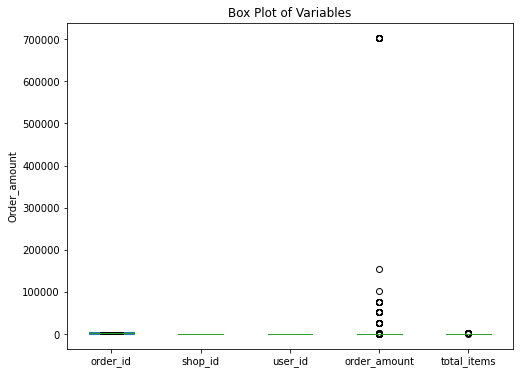

In [6]:
df_data.plot(kind='box', figsize=(8, 6))

plt.title('Box Plot of Variables')
plt.ylabel('Order_amount')

plt.show()

<AxesSubplot:xlabel='order_amount'>

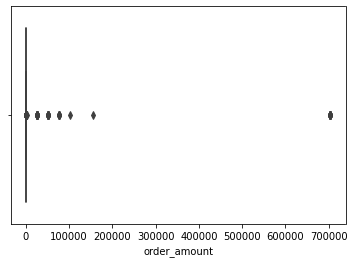

In [7]:
import seaborn as sns

sns.boxplot(x=df_data['order_amount'])

In [12]:
df_data[df_data["order_amount"]==704000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


# Plotly

In [13]:
# x and y given as array_like objects
import plotly.express as px
fig = px.scatter(x=df_data["order_id"], y=df_data["order_amount"])
fig.show()

In [9]:
import plotly.graph_objs as go

trace = go.Scatter(
   x = df_data.index,
   y = df_data["order_amount"])

go.Figure(data=[trace])

## Dash

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px


app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id="scatter-plot"),
    html.P("Order Amount:"),
    dcc.RangeSlider(
        id='range-slider',
        min=0, max=800000, step=1,
        marks={0: '0', 800000: '800000'},
        value=[0, 500]
    ),
])

@app.callback(
    Output("scatter-plot", "figure"), 
    [Input("range-slider", "value")])
def update_bar_chart(slider_range):
    low, high = slider_range
    mask = (df_data['order_amount'] > low) & (df_data['order_amount'] < high)
    fig = px.scatter(
        df_data[mask], x="order_id", y="order_amount", 
        color="order_amount", size='order_amount', 
        hover_data=['order_amount'])
    return fig

app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Jan/2021 17:46:36] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Jan/2021 17:46:36] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [12/Jan/2021 17:46:36] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [12/Jan/2021 17:46:36] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Jan/2021 17:46:42] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Jan/2021 17:46:44] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Jan/2021 17:46:56] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Jan/2021 17:46:58] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Jan/2021 17:48:24] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Jan/2021 17:48:29] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Jan/2021 17:52:03] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Jan/2021 17:52:05] "POST /_dash-update-component

Let's see how many orders have an order amount equal to 7040000.

In [ ]:
df_data[df_data["order_amount"]==704000].shape[0]

There are 17 orders with this outlier amount. We can also see that all these orders were made by using a credit card. Also, these were done by the same user with the id 607, the total amount of items ordered is 2000 and the order was always made at the same time 4:00:00 for different days in the month of march in the year 2017. The amount of items is way too big to be a normal order. Usually a regular user won't buy more than five pair of shoes.  

Since 17 orders were made in the same month with an amount that big, this would explain why the average order value is $3145.13. Indeed, by looking at the profile report generated, I could see this value as the mean of the column order_amount.

## Using Z Score 

The Z score is used to represent the relationship between the data point (observation) and the mean as well as the standard deviation of the dataset. The purpose is to find the distribution of data with a mean of 0 and a standard deviation of 1. This represents a normal distribution. Indeed, the Z-score consists of re-scaling and centralize the data to detect data points that have values far from zero. 

### The Z score can be represented by the following formula:
#### Z score = (Observation — Mean)/Standard Deviation

In [38]:
import numpy as np 

outliers = []
z_scores_list = []

def retrieve_outliers(column_data):
    
    threshold = 3
    mean = np.mean(column_data)
    std = np.std(column_data)
    print("Mean: " + str(mean))
    print("Standard deviation: " + str(std))
    
    for observation in column_data:
        z_score = (observation - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(observation)
    return outliers

In [39]:
outliers_order_amount = retrieve_outliers(df_data["order_amount"])
print("Outliers of the column order_amount are: " + str(outliers_order_amount))
print("There are " + str(len(outliers_order_amount)) + " outliers.")

Mean: 3145.128
Standard deviation: 41278.41088841982
Outliers of the column order_amount are: [704000, 704000, 704000, 154350, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000]
There are 18 outliers.


## Interquartile Range (IQR)

In [40]:
# The 25th percentile
Q1 = df_data.quantile(0.25)
# The 75th percentile
Q3 = df_data.quantile(0.75)
# The interquartile range
IQR = Q3 - Q1
print(IQR)

order_id        2499.5
shop_id           51.0
user_id          150.0
order_amount     227.0
total_items        2.0
dtype: float64


In [45]:
is_outlier_df = (df_data < (Q1 - 1.5 * IQR)) |(df_data > (Q3 + 1.5 * IQR))
is_outlier_df.loc[is_outlier_df['order_amount'] == True]

,created_at,order_amount,order_id,payment_method,shop_id,total_items,user_id
15,False,True,False,False,False,True,False
60,False,True,False,False,False,True,False
99,False,True,False,False,False,False,False
136,False,True,False,False,False,False,False
160,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...
4918,False,True,False,False,False,False,False
4927,False,True,False,False,False,False,False
4952,False,True,False,False,False,False,False
4958,False,True,False,False,False,False,False


In [47]:
def count_outliers(dataframe):
    for col in dataframe.columns:
        print("Column " + str(col) + " has " + str(dataframe[col].sum()) + " outliers.")

In [48]:
count_outliers(is_outlier_df)

Column created_at has 0 outliers.
Column order_amount has 141 outliers.
Column order_id has 0 outliers.
Column payment_method has 0 outliers.
Column shop_id has 0 outliers.
Column total_items has 18 outliers.
Column user_id has 0 outliers.


## b) What metric would you report for this dataset?

We can see that the mean is affected by these outliers. 

#### Mean before removing the outliers:

In [ ]:
df_data["order_amount"].mean()

#### Mean after removing the outliers:

In [ ]:
df_no_outliers = df_data[df_data["order_amount"] != 704000]
df_no_outliers["order_amount"].mean()

Clearly, the mean value is not an appropriate metric since it is highly impacted by the 17 values with \\$ 70 4000 as order amount. The mean without the outliers is \\$ 754.09 which represents less than 25 percent of the value before removing the outiers \\$ 3145.13 .

#### Mode before removing the outliers:

In [ ]:
df_data["order_amount"].mode()

#### Mode after removing the outliers:

In [ ]:
df_no_outliers["order_amount"].mode()

#### Median before removing the outliers:

In [ ]:
df_data["order_amount"].median()

#### Median after removing the outliers:

In [ ]:
df_no_outliers["order_amount"].median()

Mean, median and mode are measures of central tendency. But, the mean is the only value that is affected by the values of outliers. As we saw, the mean was more than four times bigger because of the outliers taken into consideration, but it was not the case for the mode neither the median.

## c) What is its value

## Part 2 

#### a. How many orders were shipped by Speedy Express in total?

SELECT COUNT(o.OrderID) FROM Orders as o 
INNER JOIN Shippers as s ON o.ShipperID = s.ShipperID
WHERE s.ShipperName = "Speedy Express"

The result of this SQL query indicates that 54 orders were shipped by Speedy Express.

#### b. What is the last name of the employee with the most orders?

SELECT LastName, MAX(total_count) FROM (SELECT LastName, COUNT(*) AS total_count FROM Employees AS e INNER JOIN Orders AS o on e.EmployeeID = o.EmployeeID
GROUP BY o.EmployeeID)

The result of this SQL query indicates that the last name of the employee with the most orders is Peacock with 40 orders.

#### c. What product was ordered the most by customers in Germany?

If by "ordered the most", we only take the amount of orders with that product, than the query would be as follow: 

SELECT ProductName, MAX(total_orders) FROM 
(SELECT ProductName, COUNT(*) AS total_orders, Country FROM Customers AS c 
INNER JOIN Orders as o on c.CustomerID = o.CustomerID
INNER JOIN OrderDetails as d on o.OrderID = d.OrderID
INNER JOIN Products as p on p.ProductID = d.ProductID
WHERE c.Country = "Germany"

The result of this SQL query indicates that the product that was ordered the most by customers in Germany is Gorgonzola Telino. It was ordered 5 times.

If we are taking the quantity of the product ordered in each order, than we have to take in consideration the quantity. Therefore, I would obtain the following query: 

SELECT ProductName, MAX(total_quantity) FROM 
(SELECT ProductName, SUM(Quantity) AS total_quantity, Country FROM Customers AS c 
INNER JOIN Orders as o on c.CustomerID = o.CustomerID
INNER JOIN OrderDetails as d on o.OrderID = d.OrderID
INNER JOIN Products as p on p.ProductID = d.ProductID
WHERE c.Country = "Germany"
GROUP BY p.ProductID)

In this case, the product ordered the most is the Boston Crab Meat with a total of 160 times.